In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
def calculate_power(mu, sigma, alpha):
    r"""
    Parameters:
    -----------
        mu : int, float
            Water-level for power allocation (i.e. Lagrange multiplier coefficient)
        sigma: int, float
            Noise power
        alpha: np.ndarray with the same size as the number of channel
            Channel gain 
    Return
    ------
        p: np.ndarray with the size of alpha.shape
            Allocated power for each channel
    """
    p = 1/mu - sigma/alpha
    # Constraint: p_i >= 0
    for idx, element in enumerate(p):
        if element < 0:
            p[idx] = 0
    return p


# Functions for bisection method
def bisection_method(fx, xmin_init, xmax_init, target):
    r""" Finding the closest solution, xopt, for the function f(x) = 0 by reducing the range between xmin and xmax 
    which corresponds to f(xmin) <= 0 and f(xmax) >= 0
    Parameters
    ----------
        fx: function
        xmin_init: int, float
            Initial guess for xmin, make sure f(xmin) <= 0
        xmax_init: int, float
            Initial guess for xmax, make sure f(xmax) >= 0
        target: float
            Operation breaks, when abs(f(xopt)) <= target
    Return
    ------
        xopt: float
            Closest solution for f(x) = 0
    """
    xmin = xmin_init
    xmax = xmax_init
    print('Initial xmin = {}, xmax = {}'.format(xmin, xmax))
    if fx(xmin)*fx(xmax) > 0:
        raise AttributeError('Error in fx(xmin)*fx(xmax) > 0')
        
    # Initial error
    error = target + 1
    while np.abs(error) > target:
        xopt = (xmin + xmax)/2 # Calculate the middle point of xmax and xmin
        error = fx(xopt)
        print('Error = {}'.format(error))
        if np.abs(error) > target:
            # Swapping the either extreme with xopt to reduce the range
            if fx(xmin)* fx(xopt) > 0: 
                xmin = xopt
            else: 
                xmax = xopt
            print('Optimized xmin = {}, xmax = {}'.format(xmin, xmax))
        else:
            print('#======= Target reached!=======#')
            break
    return xopt
    

In [108]:
sigma = 1 # noise power
alpha = np.array([4, 3, 2, 1]) # Channel gains for four channels
pmax_all = np.array([0.1, 5]) # Total avialble power
target = 10**(-3)

In [114]:
# Calculate the water-level for different total power  
mu_all = np.zeros(pmax_all.shape[0])
p_all = np.zeros((alpha_all.shape[0], pmax_all.shape[0]))
for idx, pmax in enumerate(pmax_all):
    # Initial setting
    mu_max = 100
    mu_min = 10**(-3)
    # Continuous funcion, we want to solve: p1 + p2 + p3 + p4 - pmax = 0
    def fmu(mu):
        p = calculate_power(mu, sigma, alpha)
        return np.sum(p) - pmax
    
    # Find the closest solution mu via bisection method
    mu_opt = bisection_method(fmu, mu_min, mu_max, target)
    mu_all[idx] = mu_opt
    p_all[:, idx] = calculate_power(mu_opt, sigma, alpha)
    

Initial xmin = 0.001, xmax = 100
Error = -0.1
Optimized xmin = 0.001, xmax = 50.0005
Error = -0.1
Optimized xmin = 0.001, xmax = 25.00075
Error = -0.1
Optimized xmin = 0.001, xmax = 12.500875
Error = -0.1
Optimized xmin = 0.001, xmax = 6.2509375
Error = -0.030099169257530173
Optimized xmin = 0.001, xmax = 3.12596875
Error = 0.7354578282348788
Optimized xmin = 1.563484375, xmax = 3.12596875
Error = 0.16964459253088995
Optimized xmin = 2.3447265625, xmax = 3.12596875
Error = 0.047835151020089534
Optimized xmin = 2.73534765625, xmax = 3.12596875
Error = -0.0008927819693519135
#======= Target reached!=======#
Initial xmin = 0.001, xmax = 100
Error = -5.0
Optimized xmin = 0.001, xmax = 50.0005
Error = -5.0
Optimized xmin = 0.001, xmax = 25.00075
Error = -5.0
Optimized xmin = 0.001, xmax = 12.500875
Error = -5.0
Optimized xmin = 0.001, xmax = 6.2509375
Error = -4.93009916925753
Optimized xmin = 0.001, xmax = 3.12596875
Error = -4.164542171765121
Optimized xmin = 0.001, xmax = 1.563484375
Err

In [115]:
p_all

array([[0.09122028, 1.5208165 ],
       [0.00788694, 1.43748316],
       [0.        , 1.2708165 ],
       [0.        , 0.7708165 ]])

In [116]:
mu_all

array([2.9306582 , 0.56471125])

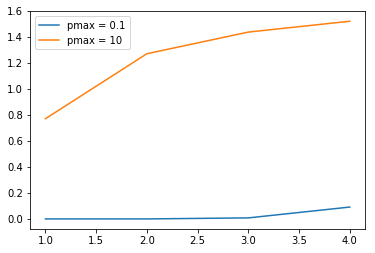

In [117]:
plt.plot(alpha, p_all[:, 0], label = 'pmax = 0.1')
plt.plot(alpha, p_all[:, 1], label = 'pmax = 10')
plt.legend()